In [124]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
import librosa

import IPython.display as ipd
from scipy.io import wavfile

In [125]:
path = 'audio/audio/'

In [126]:
audio_path1 = '3-203374-A-39.wav'
audio_path2 = '3-151557-B-28.wav'
audio_path3 = '5-221518-A-21.wav'

signal1, sr = librosa.load(path + audio_path1, sr=None)
signal2, _ = librosa.load(path + audio_path2, sr=None)
signal3, _ = librosa.load(path + audio_path3, sr=None)

In [127]:
ipd.Audio(path + audio_path1)

In [128]:
ipd.Audio(path + audio_path2)

In [129]:
ipd.Audio(path + audio_path3)

In [130]:
min_length = min(len(signal1), len(signal2), len(signal3))
singal1, signal2, signal3 = signal1[:min_length], signal2[:min_length], signal3[:min_length]

signalSummation = np.c_[signal1, signal2, signal3]
# Adding some noise
#signals += 0.4 * np.random.normal(size=signals.shape)

# Standardization of data
signalSummation /= signalSummation.std(axis=0) 

In [131]:
# Mixing the data
mixMatrix = np.array([[1, 1, 1], [1.8, 1, 1.2], [1.6, 0.2, 1.4]])

# Generate observations
obsvGenerate = np.dot(signalSummation, mixMatrix.T)  

In [132]:
# Fitting ICA and PCA models
# Compute ICA
ica = FastICA(n_components=3)
signalRecont = ica.fit_transform(obsvGenerate)  # Reconstruct signals
mix_matrix_est = ica.mixing_  # Get estimated mixing matrix

In [133]:
# compute PCA
pca = PCA(n_components=3)
# Reconstruct signals based on orthogonal components
orthosignalrecont = pca.fit_transform(obsvGenerate)

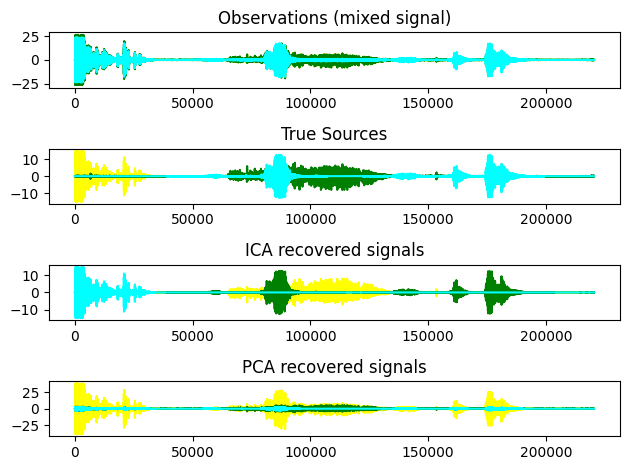

In [134]:
# Plot results
plt.figure()
models = [obsvGenerate, signalSummation, signalRecont, orthosignalrecont]
names = ["Observations (mixed signal)",
         "True Sources", "ICA recovered signals", 
         "PCA recovered signals",
         ]
colors = ["yellow", "green", "cyan"]

for i, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, i)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

#### Save audio


In [136]:
# Przeskalowanie danych ICA do typu int16
# Mnożymy przez 32767, która jest maksymalną wartością dla int16
# Scale data to int16 range and cast to int16 type
scaled_signals = np.int16(signalRecont * 32767)

In [137]:
out_filenames = []
for key in range(scaled_signals.shape[1]):
    out_filename = "out_signal_" + str(key) + ".wav"
    wavfile.write(out_filename, sr, scaled_signals[:, key])
    out_filenames.append(out_filename)

In [138]:
# Play audio
ipd.Audio('out_signal_0.wav')

In [139]:
# Play audio
ipd.Audio('out_signal_1.wav')

In [140]:
# Play audio
ipd.Audio('out_signal_2.wav')